# Objective
#### Our goal is to track emotions. Precisely, we like to know whether the person is Happy or Not-Happy based on pictures of their facial expressions. This is one of the exercises from the course, given by Prof. Andrew NG. 

In [1]:
# Copy into first cell
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ML_Learning/CNN_course_NG/"

# Switch to uploaded folder
import os
os.chdir('gdrive/My Drive/ML_Learning/CNN_course_NG/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%tensorflow_version 1.x
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import  Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

# import tensorflow as tf 
import tensorflow as tf
import h5py


import numpy as np
import random as rn
from random import randint
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
# Function to load training and testing data

def load_dataset(train_path,test_path):
    
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset('datasets/train_happy.h5','datasets/test_happy.h5')

# Normalize image vectors 
X_train = X_train_orig/225.
X_test = X_test_orig/225.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

# Print numbers of training and test examples
print("Number of training examples = " + str(X_train.shape[0]))
print("Number of test examples = " + str(X_test.shape[0]))

# Numbers of inputs and outputs
print("Input shape: " + str(X_train.shape[1:]))
print("Output shape: " + str(Y_train.shape[1]))


Number of training examples = 600
Number of test examples = 150
Input shape: (64, 64, 3)
Output shape: 1


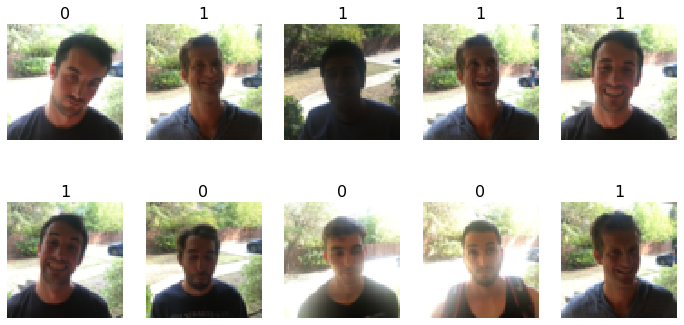

In [5]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
NumbersFigures = 10
plots(X_train_orig[0:NumbersFigures],titles = np.squeeze(Y_train_orig[0:NumbersFigures]), rows = 2)

## Build a model using Keras

In [6]:
happyModel = Sequential([
    Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (64,64,3)),
    MaxPooling2D((2,2), strides = None, padding ='same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2,2), strides = None, padding ='same'),
    Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    Flatten(),
    Dense(1, activation = 'sigmoid'),
])

In [7]:
happyModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [8]:
happyModel.compile(Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
happyModel.fit(X_train, Y_train, validation_split = 0.2, batch_size= 20, epochs= 24, shuffle = True, verbose = 2)




Train on 480 samples, validate on 120 samples
Epoch 1/24





 - 13s - loss: 0.6819 - acc: 0.5813 - val_loss: 0.6580 - val_acc: 0.7417
Epoch 2/24
 - 0s - loss: 0.6517 - acc: 0.6354 - val_loss: 0.6205 - val_acc: 0.8167
Epoch 3/24
 - 0s - loss: 0.5872 - acc: 0.7417 - val_loss: 0.5446 - val_acc: 0.8417
Epoch 4/24
 - 0s - loss: 0.4991 - acc: 0.7958 - val_loss: 0.4601 - val_acc: 0.8250
Epoch 5/24
 - 0s - loss: 0.4194 - acc: 0.8188 - val_loss: 0.3865 - val_acc: 0.8083
Epoch 6/24
 - 0s - loss: 0.3368 - acc: 0.8625 - val_loss: 0.2829 - val_acc: 0.9167
Epoch 7/24
 - 0s - loss: 0.2842 - acc: 0.8771 - val_loss: 0.2169 - val_acc: 0.9417
Epoch 8/24
 - 0s - loss: 0.2332 - acc: 0.9229 - val_loss: 0.1752 - val_acc: 0.9500
Epoch 9/24
 - 0s - loss: 0.2015 - acc: 0.9312 - val_loss: 0.1405 - val_acc: 0.9583
Epoch 10/24
 - 0s - loss: 0.2208 - acc: 0.8937 - val_loss: 0.1702 - val_acc: 0.9583
Epoch 11/24
 - 0s - loss: 0.1654 - acc: 0.9437 - val_loss: 0.1370 - val_acc: 0.9667
Epoch 12/24
 - 0s - loss: 0.17